In [1]:
import os
os.chdir('..')
print(os.getcwd())

/workspace/MLV_IR_OD


In [2]:
from PIL import Image, ImageDraw
import json

#result_file_path = "0910_1result.txt"


# Load the result file (assuming it's in JSON format)
#with open(result_file_path, 'r') as f:
#    result_data = json.load(f)

#key = 3
#bbox = result_data[key]['bbox']

#print(result_data[key])

def visualize(image_id, bbox_list):
    image_dir = "datasets/hscai/images/test_open"
    image_path = os.path.join(image_dir, image_id)
    image_path += '.png'

    # Load the image
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        # Creating a placeholder image if the actual image is not available
        image = Image.new("RGB", (500, 500), (255, 255, 255))  # Example image if not found


    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    for bbox in bbox_list:

        # Extracting bbox values (x_left, y_top, width, height)
        x_left, y_top, w, h = bbox

        # Calculating bottom-right corner
        x_right = x_left + w
        y_bottom = y_top + h

        # Draw the bounding box
        draw.rectangle([x_left, y_top, x_right, y_bottom], outline="red", width=2)

    # Save or display the image
    image.show()  # To display the image
    image.save("output_image_with_bbox.jpg")  # To save the image with the bounding box



In [21]:
from PIL import Image, ImageDraw, ImageFont
import os

# Define label names
label_names = ['Person', 'Car', 'Truck', 'Bus', 'Bicycle', 'Bike', 'Extra_vehicle', 'Dog']

def draw_bboxes_on_image(image_path, bbox_list):
    # Load the image
    try:
        image = Image.open(image_path)
    except FileNotFoundError:
        print(f"Image not found: {image_path}")
        return
    
    # Get image dimensions
    img_width, img_height = image.size
    
    # Create a drawing context
    draw = ImageDraw.Draw(image)
    
    # Optional: You can load a font if needed, or use the default
    try:
        font = ImageFont.truetype("arial.ttf", 15)  # Load font (ensure the font file is available)
    except IOError:
        font = ImageFont.load_default()  # Use default font if not available

    # Iterate through each bounding box and label
    for bbox_data in bbox_list:
        label = bbox_data['category_id']  # Get label index
        bbox = bbox_data['bbox']  # Get bounding box coordinates
        
        # Extract normalized bbox values (x_center, y_center, width, height)
        x_left, y_top, w, h = bbox
        
        # Convert normalized coordinates to pixel values
        
        # Convert to top-left corner (x_left, y_top) and bottom-right corner (x_right, y_bottom)
        x_right = x_left + w 
        y_bottom = y_top + h 
        
        # Draw the bounding box
        draw.rectangle([x_left, y_top, x_right, y_bottom], outline="red", width=2)

        # Draw the label text above the bounding box
        label_text = label_names[label]  # Get the class label name
        draw.text((x_left, y_top - 10), label_text, fill="red", font=font)  # Position label above bbox

    # Save or display the image
    image.show()  # To display the image
    image.save("output_image_with_bboxes.jpg")  # To save the image with the bounding box


In [3]:

# submit format: {"image_id": "val_0", "category_id": 5, "bbox": [359.361, 207.394, 22.972, 43.519], "score": 0.01585}, 
def convert_to_submit(result_dict_list, bbox_obj, image_id):

    for idx in range(len(bbox_obj.cls)):
        result_dict = {}
        result_dict["image_id"] = image_id
        result_dict["category_id"] = int(bbox_obj.cls[idx].detach().item())
        result_dict["bbox"] = bbox_obj.xyxy[idx].detach().tolist()[:2] + bbox_obj.xywh[idx].detach().tolist()[2:]
        result_dict["score"] = bbox_obj.conf[idx].detach().item()
        result_dict_list.append(result_dict)

/workspace/MLV_IR_OD/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")



image 1/1 /workspace/MLV_IR_OD/datasets/hscai/images/test_open/test_open_1320.png: 480x640 13 persons, 3 cars, 3 bicyles, 2 bikes, 17.4ms
Speed: 0.9ms preprocess, 17.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'car', 2: 'truck', 3: 'bus', 4: 'bicyle', 5: 'bike', 6: 'extra_vehicle', 7: 'dog\u200b'}
obb: None
orig_img: array([[[132, 132, 132],
        [132, 132, 132],
        [138, 138, 138],
        ...,
        [204, 204, 204],
        [205, 205, 205],
        [196, 196, 196]],

       [[129, 129, 129],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [194, 194, 194],
        [207, 207, 207],
        [209, 209, 209]],

       [[122, 122, 122],
        [125, 125, 125],
        [125, 125, 125],
        ...,
        [204, 204, 204],
        [196, 196, 196],
        [204, 204, 204]],



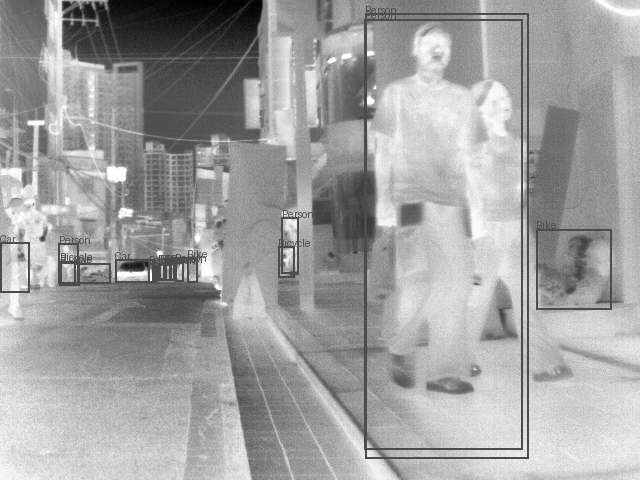

In [22]:
from ultralytics import YOLOv10

img_id = 'test_open_1320'
img_path = 'datasets/hscai/images/test_open/' + img_id + '.png'
model = YOLOv10("checkpoints/yolo10x_hscaionly_256epoch/best.pt")
result = model.predict(img_path, conf=0.01)

print(result)

bullshit_list = []
convert_to_submit(bullshit_list, bbox_obj=result[0].boxes, image_id=img_id)
print(bullshit_list)

num =1
bbox_list = [item['bbox'] for item in bullshit_list]
print(bbox_list)

draw_bboxes_on_image(img_path, bullshit_list)
#visualize(img_id, None)

In [ ]:
dsad